In [43]:
# Import Library
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from main import loadModel

In [36]:
data = pd.read_csv("student-mat.csv", sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]

# Delete column G3
x = np.array(data.drop([predict], 1))

# Array with only with G3 values
y = np.array(data[predict])

# Distribution of data for training and testing
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


# Training your own model

In [40]:
# Train model multiple times for the best score

best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
     # Load model
    linear = linear_model.LinearRegression()

     # Model training
    linear.fit(x_train, y_train)

    # coefficient of determination R^2 of the prediction
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
         # Saving the model
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)



Accuracy: 0.8513113249231359
Accuracy: 0.8893101262995776
Accuracy: 0.7725843116014126
Accuracy: 0.8311900119848831
Accuracy: 0.8806059394204376
Accuracy: 0.8138509275236407
Accuracy: 0.810050730892738
Accuracy: 0.8296340615828901
Accuracy: 0.7042797828167253
Accuracy: 0.9065913460484333
Accuracy: 0.8908845376904193
Accuracy: 0.9244421373941812
Accuracy: 0.8888033067884303
Accuracy: 0.8429034210970654
Accuracy: 0.8415466581785548
Accuracy: 0.8556895980075729
Accuracy: 0.8269667352494435
Accuracy: 0.8116439389815393
Accuracy: 0.7464689256629203
Accuracy: 0.7864212353768163


# Or use a trained model

In [ ]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [38]:
# predict G3 values of test values
predicted = linear.predict(x_test)

In [41]:

# printing the G3 prediction, X values and the true value of G3
print('predicted:       values:         Original result:')
for x in range(len(predicted)):
    print(predicted[x],  x_test[x], y_test[x])

predicted:       values:         Original result:
6.298709188528982 [7 8 8 0 4] 8
13.805744115566284 [9 9 4 0 2] 10
-0.9088164168408797 [17 16  0  0  2] 16
7.2397851025614415 [5 8 0 3 2] 7
12.750492694388182 [11 10  0  0  1] 10
8.82159467129502 [5 0 0 3 1] 0
15.743216284814428 [10 12 16  0  2] 11
8.450259426986957 [ 6  9 14  2  1] 8
14.430805126473901 [10  9  2  0  3] 10
6.326785827952543 [10 11  2  0  2] 11
-0.39933061179094564 [14 13  2  0  2] 13
8.213006199719112 [8 9 0 0 1] 8
6.138469301402624 [ 9 12  3  0  3] 11
18.873290540444337 [7 7 6 0 3] 7
7.634533750640076 [8 9 4 0 2] 10
12.699240896906606 [12 12  0  0  2] 11
18.94715073493579 [ 9  7 18  0  2] 6
9.139643846270685 [11 10  4  0  3] 10
12.848995557740325 [11 13 10  1  1] 13
12.74542695535484 [13 11 40  1  3] 11
9.317475146527967 [6 0 0 0 2] 0
17.156164578357924 [10  9  7  0  3] 9
11.141008989611388 [10 11  8  0  1] 10
-1.9436859014309287 [6 7 0 0 2] 0
9.812522684097015 [11 12 10  0  2] 13
13.83585502684067 [ 9 10  4  0  3] 10
-

# Drawing and plotting model

No handles with labels found to put in legend.


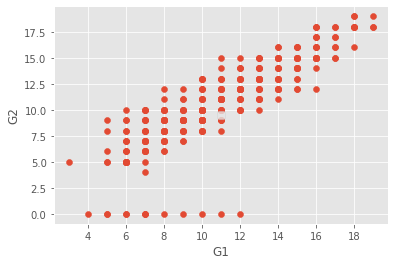

In [44]:
style.use("ggplot")
plt.scatter(data['G1'], data["G2"]) 
plt.legend(loc=10)
plt.xlabel("G1")
plt.ylabel("G2")
plt.show()